# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 20.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
84479,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0122,0.0024,0.0024,0,0,0,0
456660,0.0732,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0513,0.0024,0.0757,0,0,0,0
442773,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0024,0.0024,0,0,0,0
86731,0.6030,0.0073,0.0024,0.0024,0.0024,0.0122,0.1099,0.6567,0.0024,0.0586,3,0,11,0
414640,0.8398,0.0122,0.0049,0.0024,0.0024,0.0024,0.0342,0.2368,0.0024,0.0293,6,0,19,0


In [3]:
raw_data.shape

(469983, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469983 entries, 0 to 469982
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          469983 non-null  float64
 1   Emg2          469983 non-null  float64
 2   Emg3          469983 non-null  float64
 3   Emg4          469983 non-null  float64
 4   Emg5          469983 non-null  float64
 5   Emg6          469983 non-null  float64
 6   Emg7          469983 non-null  float64
 7   Emg8          469983 non-null  float64
 8   Emg9          469983 non-null  float64
 9   Emg10         469983 non-null  float64
 10  repetition    469983 non-null  int64  
 11  rerepetition  469983 non-null  int64  
 12  stimulus      469983 non-null  int64  
 13  restimulus    469983 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.2 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000,469983.000000
mean,0.519579,0.168986,0.110115,0.065947,0.035622,0.079689,0.445016,0.400604,0.146198,0.265693,3.157821,2.165272,5.597981,4.009179
std,0.555217,0.341448,0.236890,0.151314,0.078130,0.170031,0.786864,0.443671,0.346554,0.435951,3.483234,3.229908,6.578078,6.248982
min,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144000,0.002400,0.002400,0.002400,0.002400,0.002400,0.026900,0.151400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.383300,0.002400,0.002400,0.002400,0.002400,0.007300,0.114700,0.249000,0.002400,0.078100,2.000000,0.000000,3.000000,0.000000
75%,0.688500,0.166000,0.117200,0.053700,0.026900,0.073200,0.488300,0.444300,0.131800,0.312500,6.000000,4.000000,10.000000,7.000000
max,4.668000,4.438500,3.168900,2.612300,1.079100,1.953100,4.665500,4.668000,4.660600,4.663100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     200142
12     15607
2      15597
7      15595
4      15591
8      15588
9      15585
11     15572
6      15563
5      15543
10     15525
1      15524
3      15524
17     10407
14     10407
13     10406
15     10380
16     10328
19      5204
21      5202
18      5200
22      5171
23      5162
20      5160
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

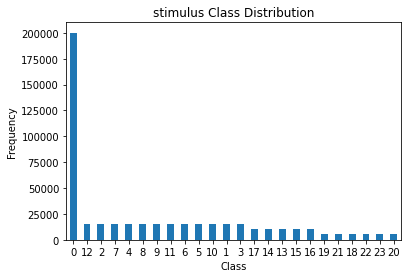

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
293542,0.0146,0.0024,0.0024,0.0024,0.0024,0.0098,0.0757,0.0635,0.0024,0.1221,0,0,0,0
307047,0.8057,0.5469,0.5640,0.1855,0.1343,0.2563,0.9106,0.2881,0.6738,0.7153,9,9,7,7
380538,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.1343,0.0024,0.0024,0,0,0,0
306693,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0903,0.0024,0.0024,0,0,0,0
195315,1.8506,0.7568,0.6885,1.0840,0.2100,0.1782,0.8398,1.0938,1.3892,0.9766,1,1,12,12


In [12]:
raw_data.shape

(383870, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383870 entries, 0 to 469982
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          383870 non-null  float64
 1   Emg2          383870 non-null  float64
 2   Emg3          383870 non-null  float64
 3   Emg4          383870 non-null  float64
 4   Emg5          383870 non-null  float64
 5   Emg6          383870 non-null  float64
 6   Emg7          383870 non-null  float64
 7   Emg8          383870 non-null  float64
 8   Emg9          383870 non-null  float64
 9   Emg10         383870 non-null  float64
 10  repetition    383870 non-null  int64  
 11  rerepetition  383870 non-null  int64  
 12  stimulus      383870 non-null  int64  
 13  restimulus    383870 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.9 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 83.72626149477688


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     39905
           1       0.76      0.76      0.76      2026
           2       0.72      0.74      0.73      1975
           3       0.72      0.73      0.73      1946
           4       0.74      0.71      0.73      1879
           5       0.70      0.69      0.69      1902
           6       0.73      0.73      0.73      2223
           7       0.75      0.74      0.75      2014
           8       0.71      0.72      0.71      2031
           9       0.68      0.66      0.67      2112
          10       0.65      0.65      0.65      2062
          11       0.70      0.71      0.70      2170
          12       0.66      0.67      0.66      2160
          13       0.72      0.70      0.71      1517
          14       0.69      0.69      0.69      1419
          15       0.64      0.67      0.66      1307
          16       0.75      0.76      0.75      1635
 

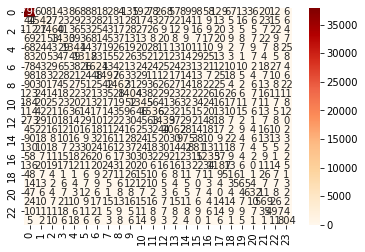

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.2311850366009327
MSE: 13.906309427670825
RMSE: 3.7291164406157695


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8375860134871217
Recall Score :  0.8372626149477688
f1_score :  0.8373886094135408


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 93.61763096881756


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     39905
           1       0.94      0.94      0.94      2026
           2       0.92      0.91      0.92      1975
           3       0.94      0.91      0.93      1946
           4       0.95      0.89      0.92      1879
           5       0.91      0.88      0.90      1902
           6       0.94      0.89      0.92      2223
           7       0.94      0.90      0.92      2014
           8       0.91      0.87      0.89      2031
           9       0.91      0.85      0.88      2112
          10       0.89      0.82      0.85      2062
          11       0.91      0.89      0.90      2170
          12       0.90      0.80      0.85      2160
          13       0.95      0.85      0.90      1517
          14       0.91      0.85      0.88      1419
          15       0.91      0.84      0.87      1307
          16       0.94      0.89      0.91      1635
 

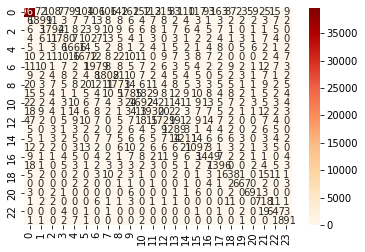

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.5326803344882383
MSE: 6.35147315497434
RMSE: 2.520212918579369


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9357740352950503
Recall Score :  0.9361763096881757
f1_score :  0.9350740710350542


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 95.1702399249746


Classification report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     39905
           1       0.97      0.93      0.95      2026
           2       0.96      0.92      0.94      1975
           3       0.97      0.92      0.95      1946
           4       0.97      0.91      0.94      1879
           5       0.95      0.91      0.93      1902
           6       0.98      0.91      0.94      2223
           7       0.97      0.92      0.95      2014
           8       0.95      0.90      0.92      2031
           9       0.96      0.88      0.92      2112
          10       0.93      0.85      0.89      2062
          11       0.95      0.92      0.94      2170
          12       0.95      0.83      0.88      2160
          13       0.98      0.90      0.94      1517
          14       0.95      0.88      0.92      1419
          15       0.95      0.88      0.91      1307
          16       0.96      0.93      0.94      1635
 

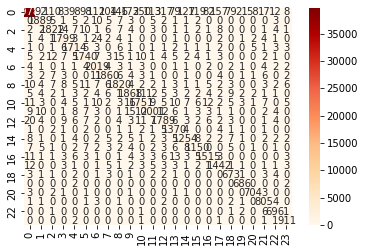

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.43473050772396904
MSE: 5.3027847969364625
RMSE: 2.302777626462543


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9523168901559176
Recall Score :  0.951702399249746
f1_score :  0.951040539483311


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 94.1672962200745


Classification report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     39905
           1       0.96      0.92      0.94      2026
           2       0.94      0.91      0.92      1975
           3       0.95      0.91      0.93      1946
           4       0.95      0.89      0.92      1879
           5       0.92      0.89      0.91      1902
           6       0.97      0.88      0.92      2223
           7       0.95      0.90      0.93      2014
           8       0.93      0.88      0.91      2031
           9       0.92      0.86      0.89      2112
          10       0.90      0.84      0.86      2062
          11       0.93      0.89      0.91      2170
          12       0.93      0.81      0.86      2160
          13       0.96      0.88      0.92      1517
          14       0.93      0.87      0.90      1419
          15       0.92      0.85      0.88      1307
          16       0.94      0.91      0.92      1635
 

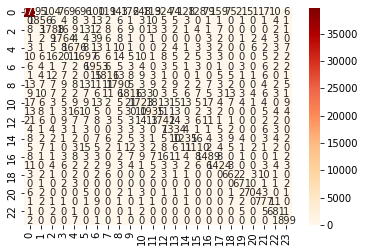

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.49088232995545367
MSE: 5.804868835803788
RMSE: 2.409329540723682


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9416367626816651
Recall Score :  0.941672962200745
f1_score :  0.9407306780937257


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 88.35152525594603


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     39905
           1       0.87      0.81      0.84      2026
           2       0.83      0.81      0.82      1975
           3       0.85      0.81      0.83      1946
           4       0.86      0.78      0.82      1879
           5       0.77      0.75      0.76      1902
           6       0.88      0.74      0.81      2223
           7       0.86      0.81      0.83      2014
           8       0.81      0.74      0.77      2031
           9       0.75      0.69      0.72      2112
          10       0.73      0.71      0.72      2062
          11       0.77      0.75      0.76      2170
          12       0.82      0.67      0.73      2160
          13       0.81      0.73      0.77      1517
          14       0.83      0.74      0.78      1419
          15       0.78      0.72      0.75      1307
          16       0.83      0.82      0.83      1635
 

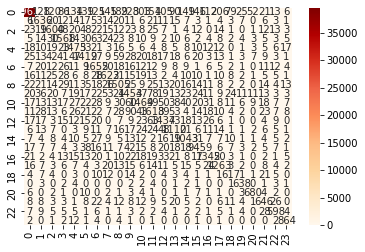

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.851720634589835
MSE: 9.404954802407065
RMSE: 3.066749876075169


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8801696329905443
Recall Score :  0.8835152525594603
f1_score :  0.8804615176860547
